# Random Forests

Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"Company_Data.csv")
print("data Shape:",data.shape)
data.tail()

data Shape: (400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [4]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print(data[data.duplicated()])


 Describe:
            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max  

# Analysing the Data

In [5]:
data_M=data.copy()
data_M

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Feature Engineering:

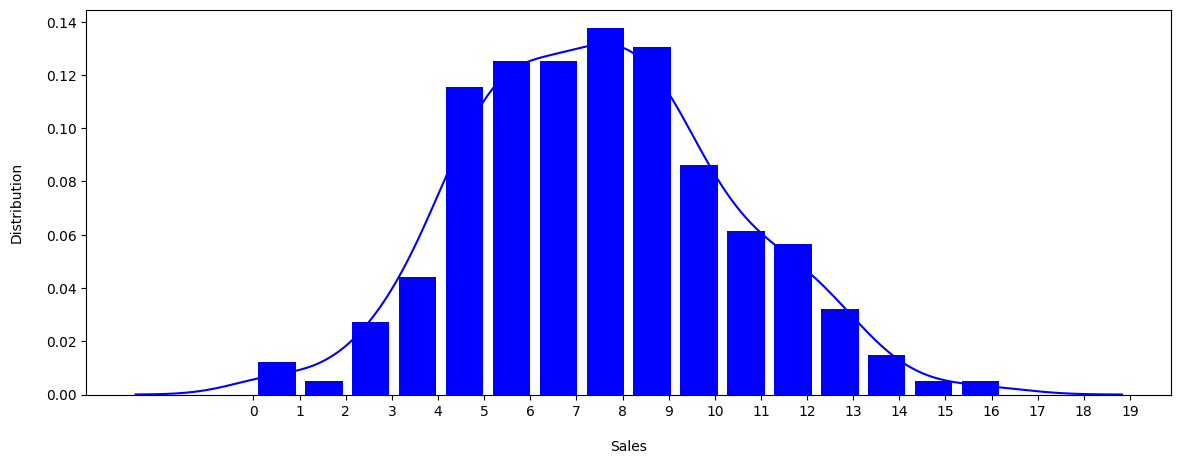

In [6]:
def distplot(param):
    plt.figure(figsize=(14,5))
    sns.distplot(data_M[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1))
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Sales")

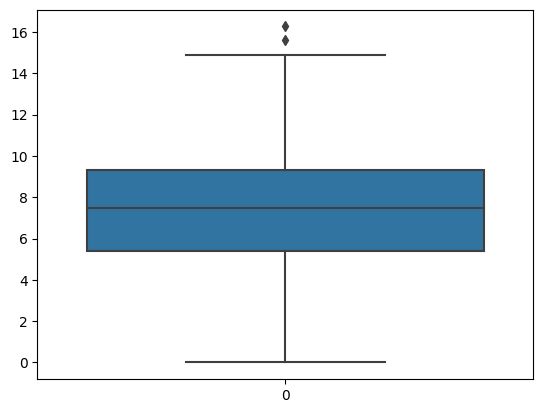

In [7]:
sns.boxplot(data_M["Sales"])
plt.show()

Because the Sales distribution is not skewed and is normal, we can use the mean or median as a threshold to divide the sales into two or three categories: 'Low', 'Medium', and 'High'.

Assume Sales <5 as "Low" and Sales > 10 as "High" and in between 'Medium' for three categories.

In [8]:
# feature engineer
def split(num):
    if num < 5:
        return 'Low'
    elif num >= 5 and num<10:
        return 'Medium'
    else:
        return 'High'
    
data_M['Sales'] = data_M['Sales'].apply(split)
data_M

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Medium,100,79,7,284,95,Bad,50,12,Yes,Yes


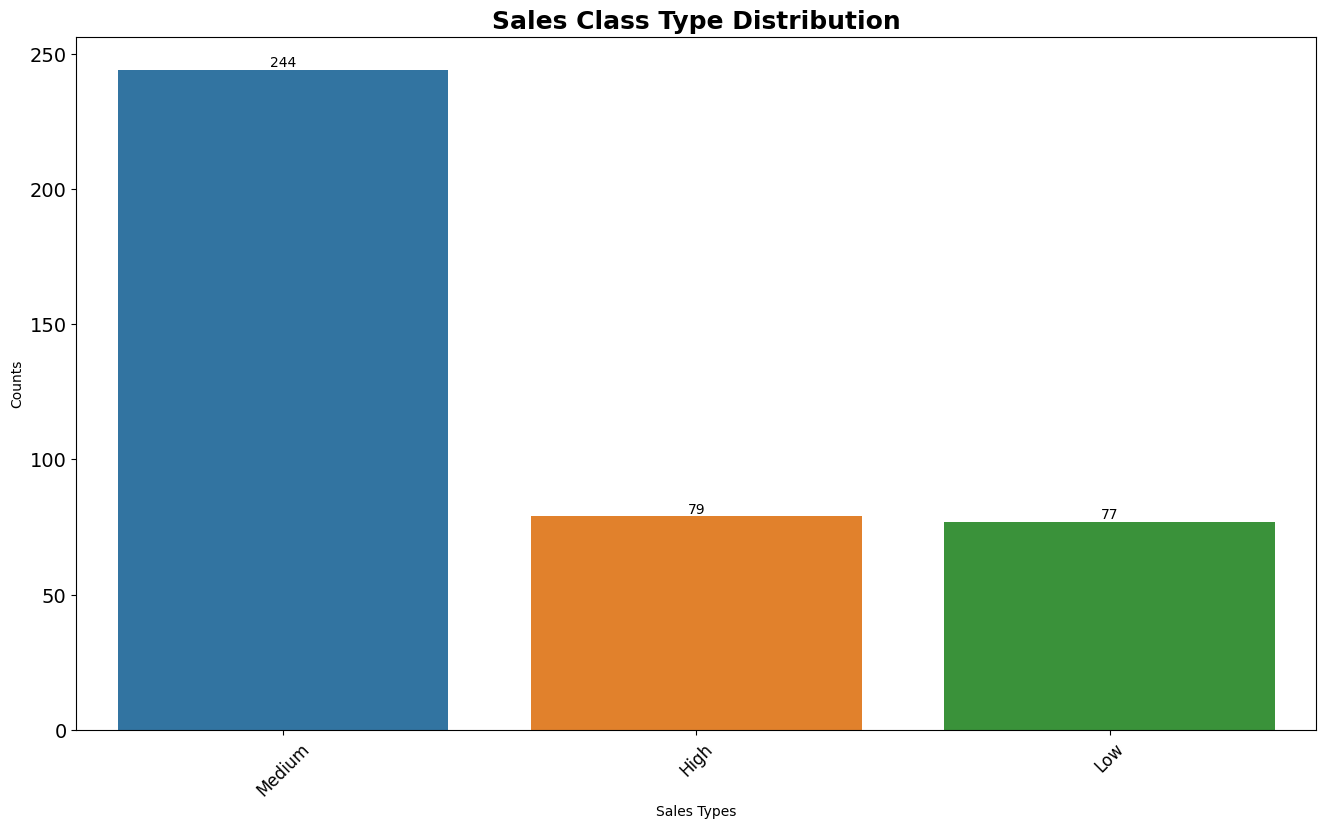

In [9]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = data_M['Sales'].value_counts().index.tolist(), y = data_M['Sales'].value_counts().tolist()) 
                # 'ax' -  to add labels to the bars
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Sales Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Sales Types')
plt.ylabel('Counts')
# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i,)

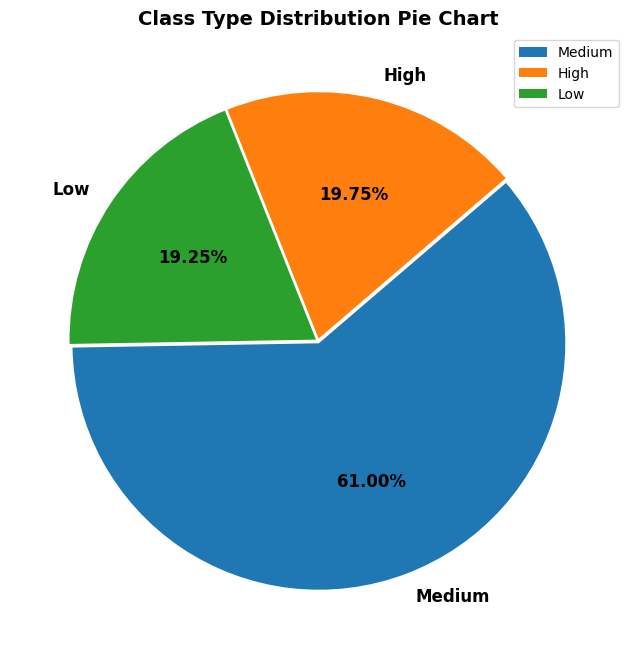

In [10]:
plt.figure(figsize = (9,8))
plt.pie(data_M['Sales'].value_counts(), labels= data_M['Sales'].unique(), explode = [0.01,0.01,0.01],
       autopct= '%.2f%%', startangle= 181, textprops = {'size':'large','fontweight':'bold','rotation':'horizontal','color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 14, fontweight = 'bold')
plt.show()

### Feature scaling

In [11]:
df_num = pd.get_dummies(data_M.iloc[:,1:])
df_num['Sales'] = data_M['Sales']
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_num['Sales'] = LE.fit_transform(df_num['Sales'])
df_num.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,True,False,False,False,True,False,True,2
1,111,48,16,260,83,65,10,False,True,False,False,True,False,True,0
2,113,35,10,269,80,59,12,False,False,True,False,True,False,True,0
3,117,100,4,466,97,55,14,False,False,True,False,True,False,True,2
4,141,64,3,340,128,38,13,True,False,False,False,True,True,False,1


# Model Building  & Testing

In [12]:
# x_train = new_data.iloc[:,:-1]    # new_data
# y_train = new_data.iloc[:,-1]
# x_test = new_data.iloc[:,:-1]
# y_test = new_data.iloc[:,-1]

X = df_num.drop(['Sales'],axis=1)
y = df_num[['Sales']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)
X_train

Shape of X_train:  (320, 14)
Shape of X_test:  (80, 14)
Shape of y_train:  (320, 1)
Shape of y_test (80, 1)


,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
93,145,30,0,67,104,55,17,False,False,True,False,True,True,False
23,121,31,0,292,109,79,10,False,False,True,False,True,True,False
299,135,40,17,497,96,54,17,False,False,True,True,False,False,True
13,115,28,11,29,86,53,18,False,True,False,False,True,False,True
90,115,22,0,491,103,64,11,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,123,81,8,198,81,80,15,True,False,False,False,True,False,True
72,115,45,0,432,116,25,15,False,False,True,False,True,True,False
396,139,23,3,37,120,55,11,False,False,True,True,False,False,True
235,126,32,8,95,132,50,17,False,False,True,False,True,False,True


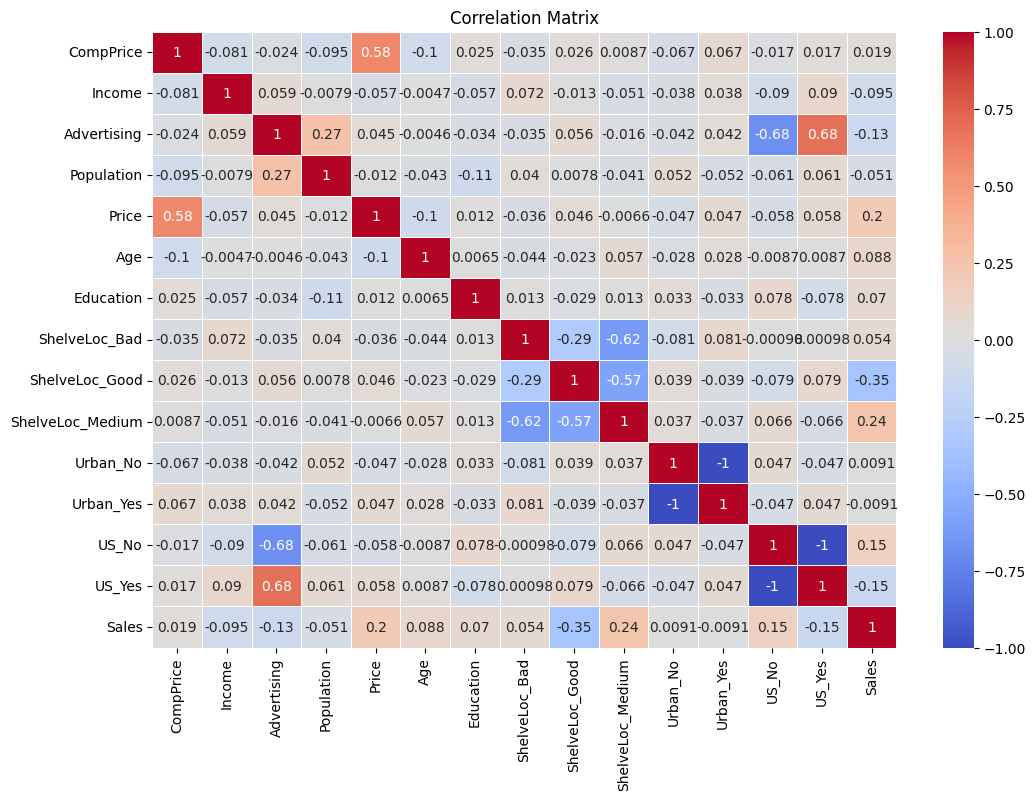

In [13]:
corr_matrix = df_num.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### feature selection with the chi-squared 

In [14]:
from sklearn.feature_selection import SelectKBest, chi2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
selected_feature_indices = test.get_support()
selected_feature_names = [X.columns[i] for i, selected in enumerate(selected_feature_indices) if selected]
print("Selected Feature Names:", selected_feature_names)
X_selected = test.transform(X)
X_selected

Selected Feature Names: ['Income', 'Advertising', 'Price', 'Age']


array([[ 73,  11, 120,  42],
       [ 48,  16,  83,  65],
       [ 35,  10,  80,  59],
       ...,
       [ 26,  12, 159,  40],
       [ 79,   7,  95,  50],
       [ 37,   0, 120,  49]], dtype=int64)

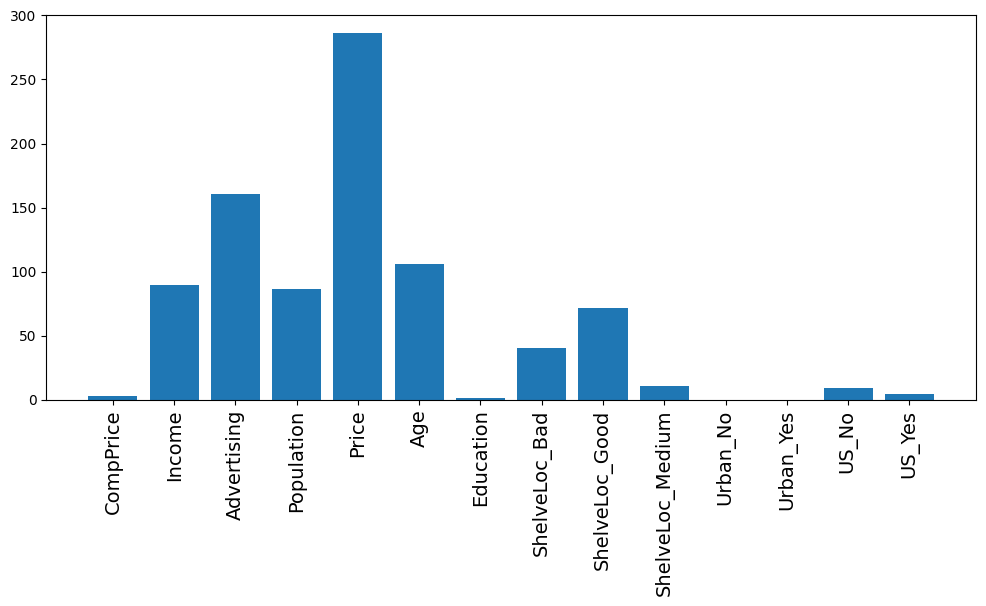

,Feature,Score
4,Price,286.205928
2,Advertising,160.325330
5,Age,105.749298
1,Income,89.707723
3,Population,86.093999
8,ShelveLoc_Good,71.825641
7,ShelveLoc_Bad,40.223069
9,ShelveLoc_Medium,11.059415
12,US_No,8.845650
13,US_Yes,4.868536


In [15]:
scores = fit.scores_
fig, axes = plt.subplots(figsize=(12,5))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation= 90, size= 14)
plt.show()

score_data = pd.DataFrame(list(zip(X.columns, scores)), columns =['Feature','Score'])
score_data.sort_values(by="Score", ascending=False, inplace=True)
score_data

### feature selection with Random Forest Built-in Feature

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
rf_classifier.fit(X, y)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {'max_depth': [2,3,5,10,20], 'min_samples_leaf': [5,10,20,50,100,200], 'n_estimators': [10,25,30,50,100,200]}

grid_search = GridSearchCV(estimator= rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X, y)
rf_best = grid_search.best_estimator_

print('Checking the oob score :', rf_classifier.oob_score_)
print('Best Score             :', grid_search.best_score_)
print('RF Best Model          :', rf_best)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Checking the oob score : 0.6875
Best Score             : 0.6875
RF Best Model          : RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)


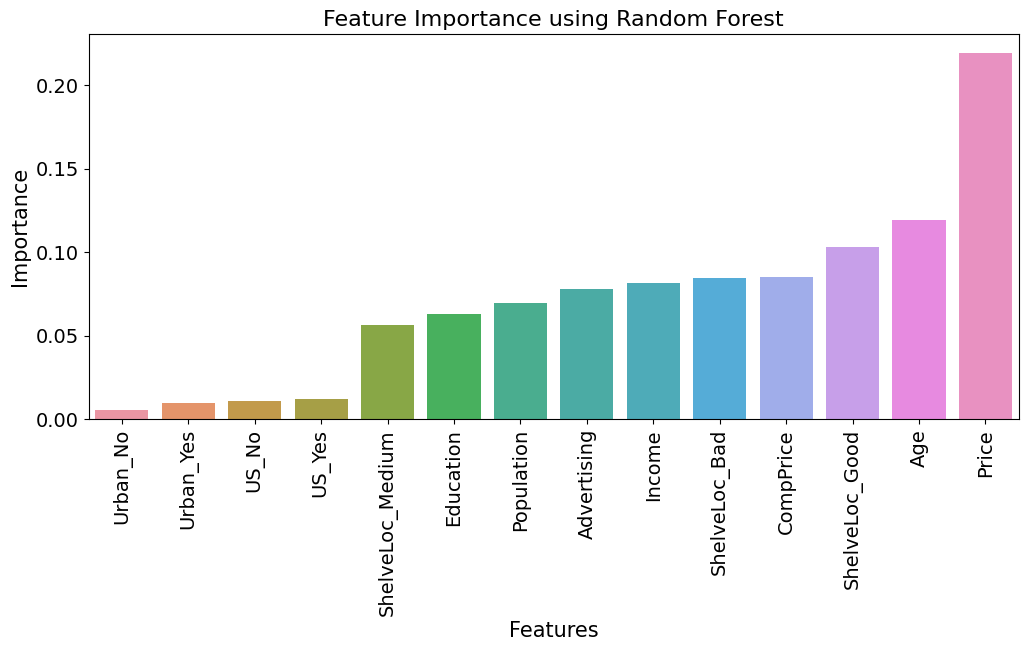

In [17]:
rf_best.feature_importances_
imp_df = pd.DataFrame({"Feature": X.columns, "Importance": rf_best.feature_importances_})

plt.figure(figsize=(12,5))
sns.barplot(x= 'Feature', y= "Importance", data= imp_df, order= imp_df.sort_values('Importance').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Importance", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Feature Importance using Random Forest", size=16)
plt.show()

## standardization

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.31854536, -1.39939402, -1.01731393, ...,  0.6352234 ,
         1.39132305, -1.39132305],
       [-0.27616777, -1.36298406, -1.01731393, ...,  0.6352234 ,
         1.39132305, -1.39132305],
       [ 0.65408156, -1.03529443,  1.53300301, ..., -1.5742493 ,
        -0.71874034,  0.71874034],
       ...,
       [ 0.91986708, -1.65426373, -0.567258  , ..., -1.5742493 ,
        -0.71874034,  0.71874034],
       [ 0.05606413, -1.3265741 ,  0.18283522, ...,  0.6352234 ,
        -0.71874034,  0.71874034],
       [-0.27616777, -0.99888447, -0.26722071, ...,  0.6352234 ,
        -0.71874034,  0.71874034]])

# Random Forest classifier

#### Base models

In [19]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=42)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
y_pred1

array([2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2])

In [20]:
model2 = RandomForestClassifier(criterion='gini', random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
y_pred2

array([2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2])

In [21]:
model3 = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
y_pred3

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2])

### Accuracy & classification report

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
print('model1:')
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))

print('\nmodel2:')
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))

print('\nmodel3:')
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy}")
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred3))

model1:
Accuracy: 0.675
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.57      0.22      0.32        18
           2       0.70      0.87      0.78        52

    accuracy                           0.68        80
   macro avg       0.61      0.53      0.54        80
weighted avg       0.66      0.68      0.64        80


model2:
Accuracy: 0.6875
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.57      0.22      0.32        18
           2       0.71      0.88      0.79        52

    accuracy                           0.69        80
   macro avg       0.63      0.54      0.55        80
weighted avg       0.67      0.69      0.65        80


model3:
Accuracy: 0.6125
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.30     

## confusion matrix

model1:


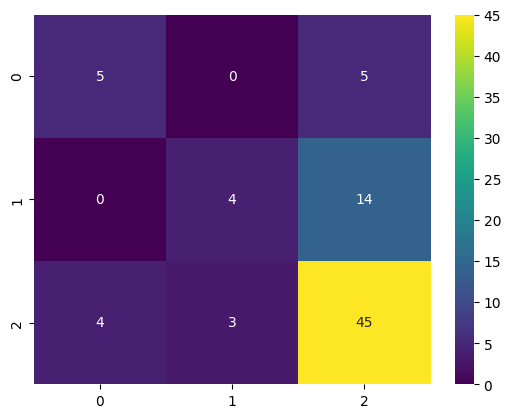


model2:


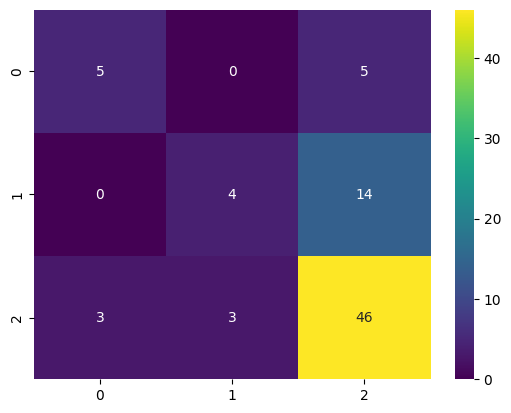


model3:


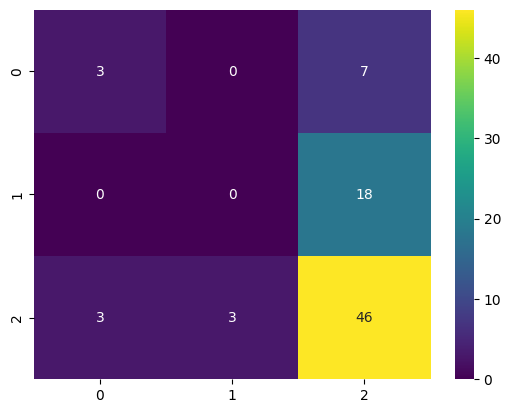

In [23]:
from sklearn.metrics import confusion_matrix
print('model1:')
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

print('\nmodel2:')
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

print('\nmodel3:')
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

## compare the actual with the predicted:

model1:


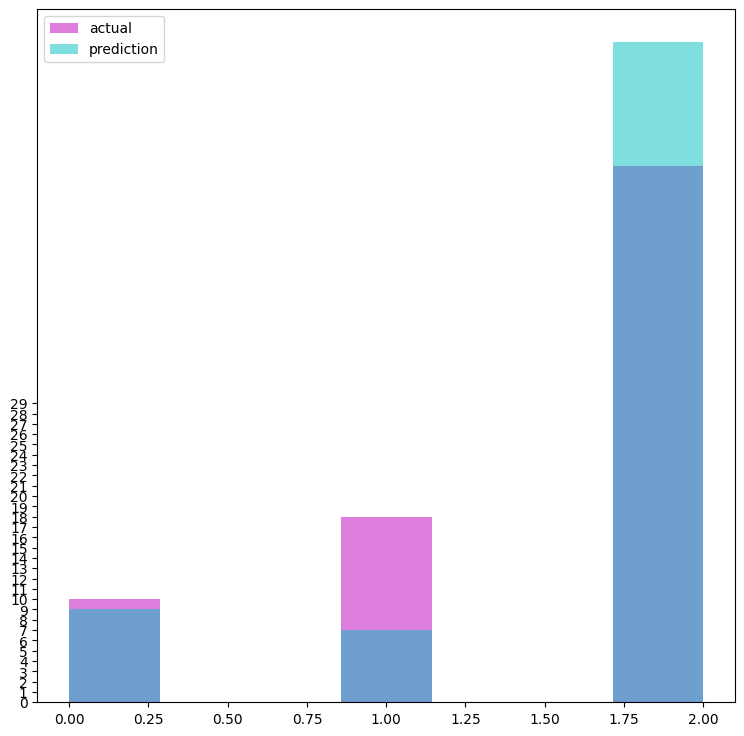

model2:


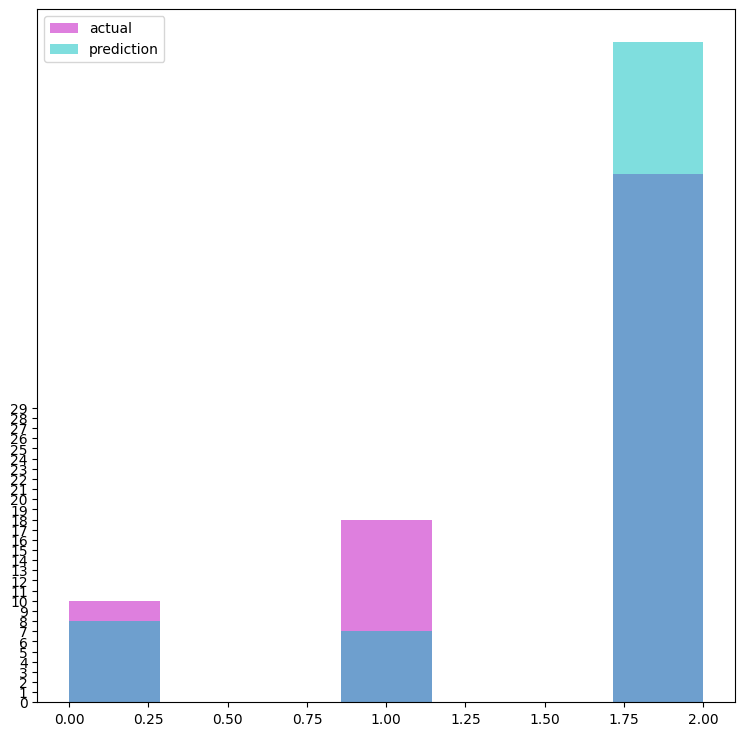

model3:


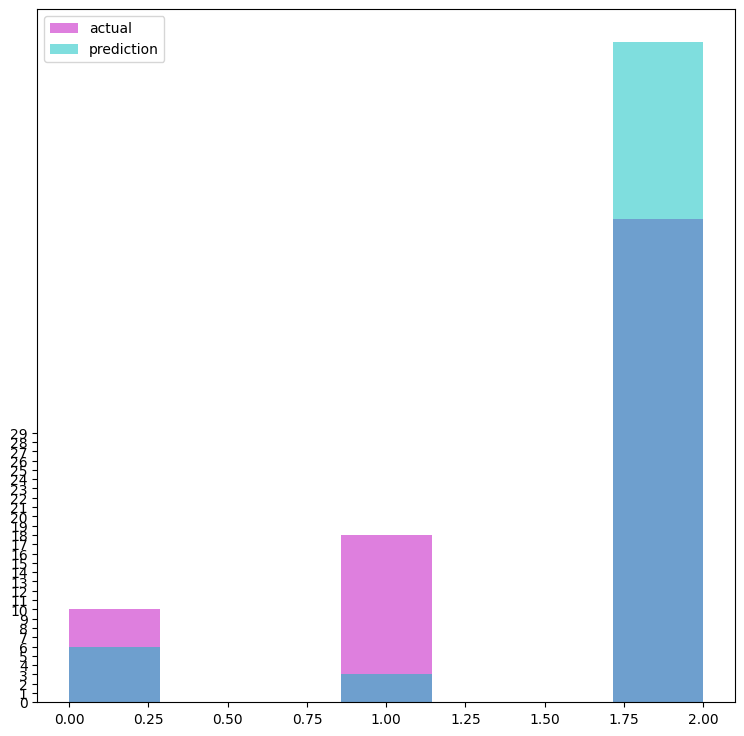

In [24]:
print('model1:')
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred1, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

print('model2:')
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred2, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

print('model3:')
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred3, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

## Precision, Recall, and F1-Score:

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('model1:')
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

print('\nmodel2:')
precision = precision_score(y_test, y_pred2, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

print('\nmodel3:')
precision = precision_score(y_test, y_pred3, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

model1:
Precision: 0.655047123015873, Recall: 0.675, F1-Score: 0.6420998185117968

model2:
Precision: 0.6666964285714286, Recall: 0.6875, F1-Score: 0.6525555555555556

model3:
Precision: 0.4836267605633803, Recall: 0.6875, F1-Score: 0.6525555555555556


## ROC Curve: Multi Classification problem

model1:


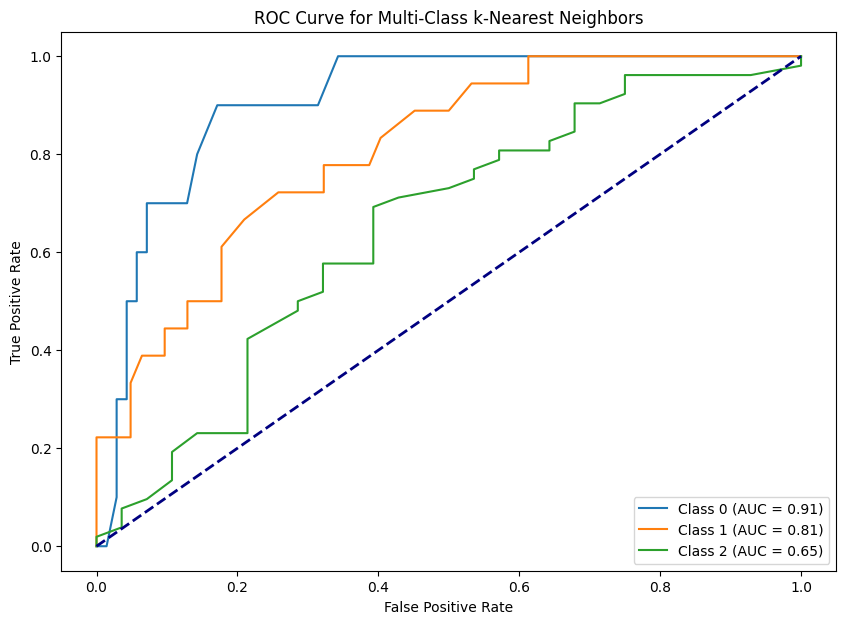


model2:


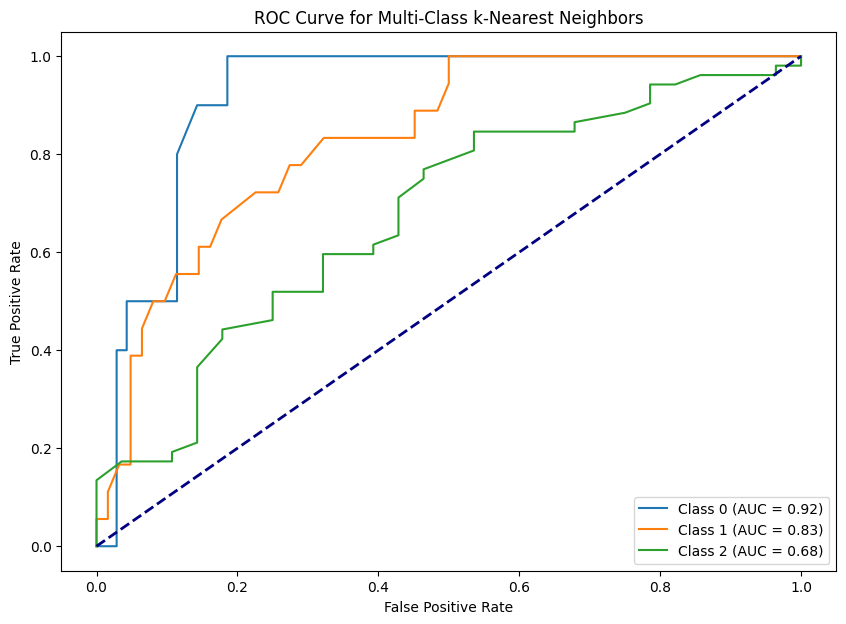


model3:


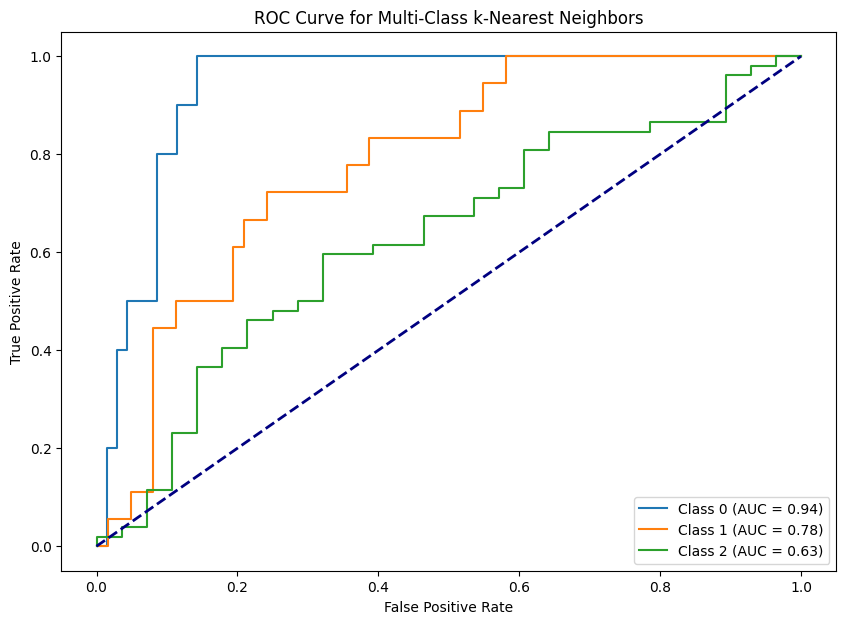

In [26]:
from sklearn.metrics import roc_curve, auc

print('model1:')
y_score = model1.predict_proba(X_test)
# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
uniq_out=np.unique(y_train)
num_classes = len(np.unique(y_train))
for i in range(num_classes):
    fpr, tpr, thresholds = roc_curve(y_test == uniq_out[i], y_score[:, i], pos_label=True)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {uniq_out[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class k-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

print('\nmodel2:')
y_score = model2.predict_proba(X_test)
# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(num_classes):
    fpr, tpr, thresholds = roc_curve(y_test == uniq_out[i], y_score[:, i], pos_label=True)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {uniq_out[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class k-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

print('\nmodel3:')
y_score = model3.predict_proba(X_test)
# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(num_classes):
    fpr, tpr, thresholds = roc_curve(y_test == uniq_out[i], y_score[:, i], pos_label=True)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {uniq_out[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class k-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

## Visualizing the decision tree in random forest

In [27]:
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 42) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

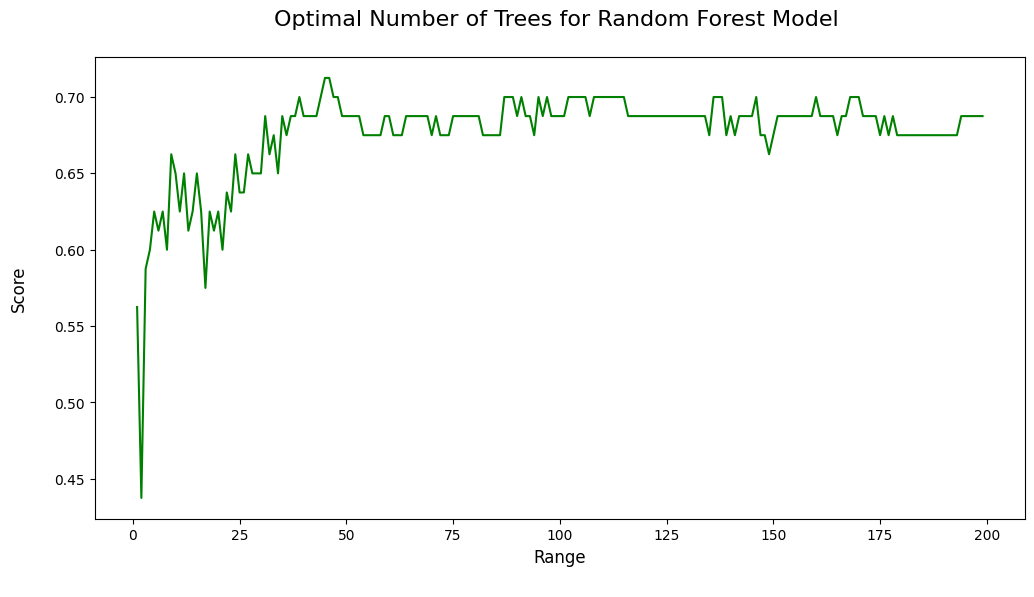

45

In [28]:
fig = plt.figure(figsize=(12,6))
plt.plot(range(1,200),score_array, color = 'g')
plt.ylabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n', horizontalalignment="center", fontsize = 16)
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

loc = np.array(score_array).max()
score_array.index(loc)+1

Decision Tree Visualization:

model1:


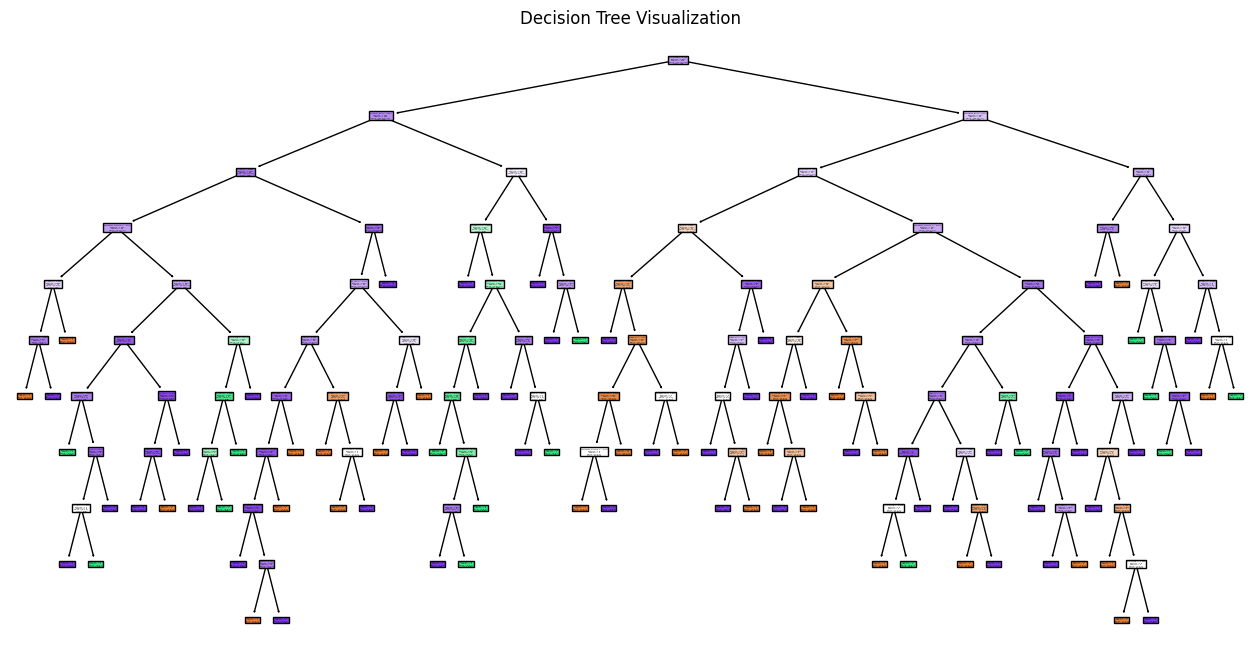


model3:


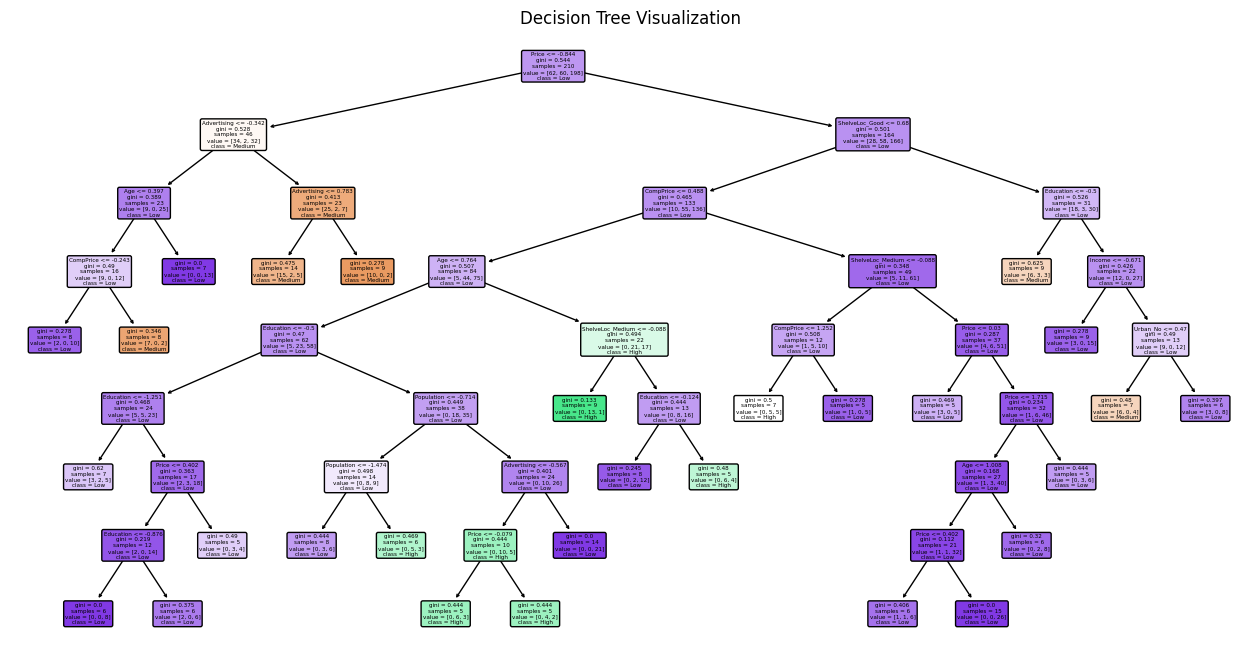

In [29]:
from sklearn.tree import plot_tree

feature_names = X.columns.tolist()
target_names = data_M['Sales'].unique().astype(str).tolist()
print('model1:')
# Plot the decision tree
plt.figure(figsize=(16, 8))
plot_tree(model1.estimators_[99], feature_names=feature_names, class_names=target_names,filled=True)
plt.title("Decision Tree Visualization")
plt.savefig('Decision Tree Visualization_Company Data1.png', dpi=600, bbox_inches='tight')
plt.show()

print('\nmodel3:')
# Plot the decision tree 
plt.figure(figsize=(16, 8))
plot_tree(model3.estimators_[45], filled=True, rounded=True, feature_names=feature_names, class_names=target_names)
plt.title("Decision Tree Visualization")
plt.savefig('Decision Tree Visualization_Company Data2.png', dpi=600, bbox_inches='tight')
plt.show()

# Final Model Developing

In [30]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [31]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt',5]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV (estimator=rf_clf, scoring='f1',param_distributions=random_grid,
                            n_iter=100, cv=3,verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Best paramters: {'n_estimators': 158, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False})
Train Result:
Accuracy Score: 93.75%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.983871   1.000000    0.909524    0.9375    0.964465   
recall      0.884058   0.813559    0.994792    0.9375    0.897470   
f1-score    0.931298   0.897196    0.950249    0.9375    0.926248   
support    69.000000  59.000000  192.000000    0.9375  320.000000   

           weighted avg  
precision      0.942236  
recall         0.937500  
f1-score       0.936381  
support      320.000000  
__________________________________________________________________________
Confusion Matrix: 
 [[ 61   0   8]
 [  0  48  11]
 [  1   0 191]]

Test Result:
Accuracy Score: 68.75%
_______________________________________________________________

In [32]:
best_hyperparameters = {
    'n_estimators': 158,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 110,
    'bootstrap': False
}

# RandomForestClassifier with best hyperparameters
model_Final = RandomForestClassifier(
    n_estimators=best_hyperparameters['n_estimators'],
    min_samples_split=best_hyperparameters['min_samples_split'],
    min_samples_leaf=best_hyperparameters['min_samples_leaf'],
    max_features=best_hyperparameters['max_features'],
    max_depth=best_hyperparameters['max_depth'],
    bootstrap=best_hyperparameters['bootstrap']
)

model_Final.fit(X_train, y_train)
y_pred_Final = model_Final.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_Final)
print(f"Accuracy: {accuracy}")
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_Final))

Accuracy: 0.675
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.50      0.22      0.31        18
           2       0.70      0.87      0.78        52

    accuracy                           0.68        80
   macro avg       0.61      0.53      0.55        80
weighted avg       0.65      0.68      0.64        80



##  model validation techniques

In [33]:
# model1 = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=42)
X = sc.fit_transform(X)

Cross-Validation:

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_Final, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.7    0.7125 0.6625 0.675  0.625 ]
Mean Accuracy: 0.675


Stratified K-Fold Cross-Validation:

In [35]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_Final, X, y, cv=skf)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.6875 0.7    0.725  0.7125 0.5875]
Mean Accuracy: 0.6824999999999999


Leave-One-Out Cross-Validation (LOOCV):

In [36]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(model_Final, X, y, cv=loo)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1

Shuffle-Split Cross-Validation:

In [37]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores = cross_val_score(model_Final, X, y, cv=ss)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.75   0.6625 0.775  0.675  0.6625]
Mean Accuracy: 0.705


Time Series Split:

In [38]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(model_Final, X, y, cv=tscv)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.63636364 0.60606061 0.66666667 0.72727273 0.74242424]
Mean Accuracy: 0.6757575757575758
